In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append( [1.0, float(lineArr[0]), float(lineArr[1])] )
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 500
    weights = np.ones( (n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error   # 这里是批量梯度上升算法，极大似然
    return weights

dataMat, labelMat = loadDataSet()
weights = gradAscent(dataMat, labelMat)
print weights.shape

(3, 1)


<type 'numpy.ndarray'> <type 'numpy.ndarray'>


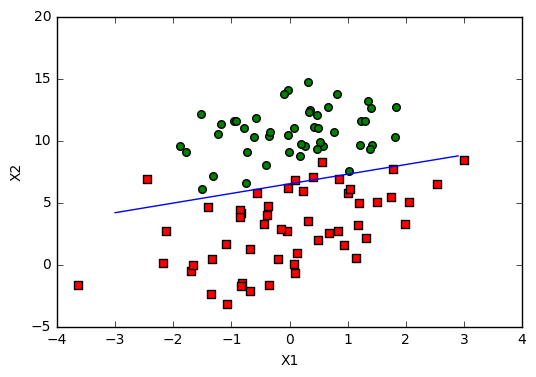

In [4]:
def plotBestFit(wei):
    weights = wei.getA()
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = dataArr.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    print type(x), type(y)
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plotBestFit(weights)

<type 'numpy.ndarray'> <type 'numpy.ndarray'>


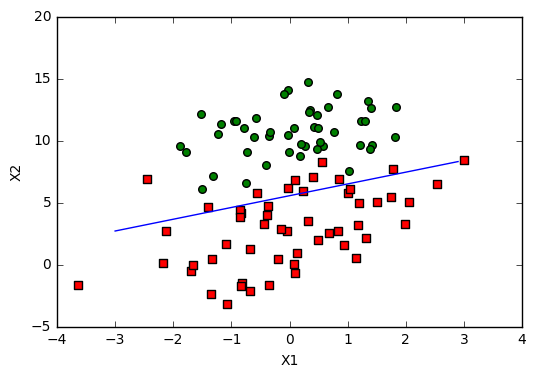

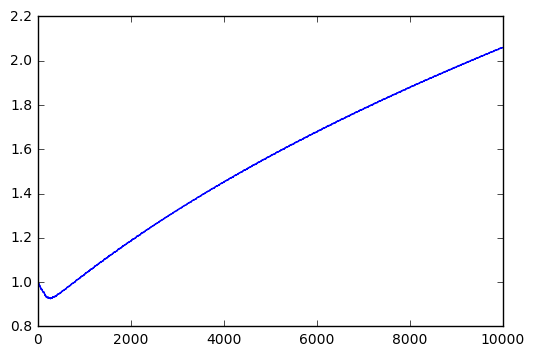

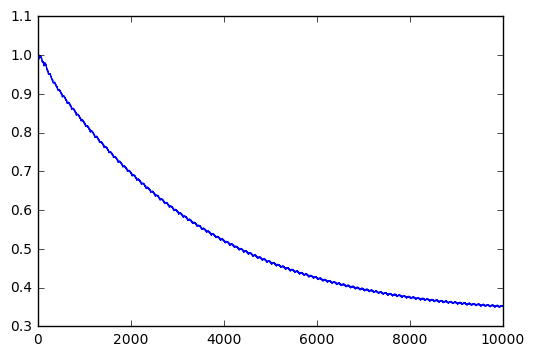

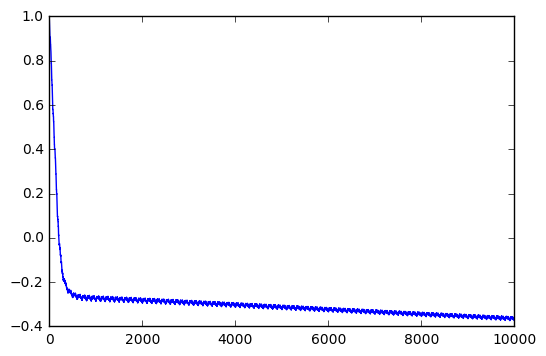

In [19]:
def  stocGradAscent0(dataMatrix, classLabels, numIter = 100):
    m, n = dataMatrix.shape
    alpha = 0.001
    weights = np.ones(n)
    iter_weights = []
    for j in range(numIter):
        for i in range(m):
            h = sigmoid(sum(dataMatrix[i] * weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            iter_weights.append(weights)
    return np.mat(weights).T, iter_weights

def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m, n = dataMatrix.shape
    alpha = 0.01
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del dataIndex[randIndex]  # 这样删除有毛用，第一次用第一个样本训练，第二次不还是有可能用第一个样本训练
    #return np.mat(weights).T
    return weights
            

dataArr, labelArr = loadDataSet()
weights, iter_weights = stocGradAscent0(np.array(dataArr), np.array(labelArr))
plotBestFit(weights)

iter_weights = np.array(iter_weights)
plt.figure()
plt.plot(range(len(iter_weights)), iter_weights[:,0])
plt.figure()
plt.plot(range(len(iter_weights)), iter_weights[:,1])
plt.figure()
plt.plot(range(len(iter_weights)), iter_weights[:,2])

<type 'numpy.ndarray'> <type 'numpy.ndarray'>


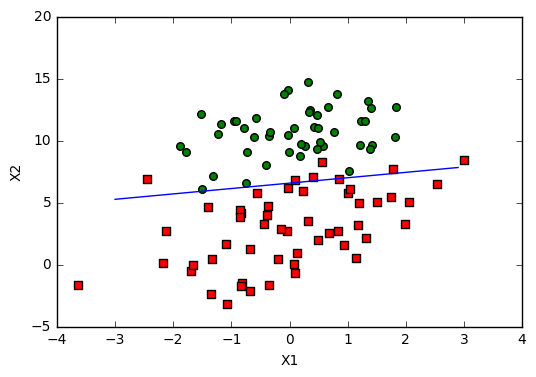

In [24]:
dataArr, labelArr = loadDataSet()
weights = stocGradAscent1(np.array(dataArr), np.array(labelArr))
plotBestFit(np.mat(weights).T)

In [6]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[i]))
        
    trainWeights = stocGradAscent1(np.array(trainingSet), np.array(trainingLabels), 500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = float(errorCount) / numTestVec
    print "the error rate of this test is : %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum / float(numTests))
               

In [7]:
%time
multiTest()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs


/home/lilinhan/workspace/software/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in exp


the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
the error rate of this test is : 0.298507
after 10 iterations the average error rate is: 0.298507
